In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)
from sklearn.metrics import ConfusionMatrixDisplay , RocCurveDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from itertools import cycle

# Model Evaluations
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


#Model Graphs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay , RocCurveDisplay
import matplotlib.pyplot as plt

# **Load data**

In [2]:
#Load the dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [6]:
'''
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1]))'''

'\nX_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1]))\nX_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1]))'

# **KNeighborsClassifier Model**

In [7]:
model = SVC()
model.fit(X_train, y_train)

SVC()

# **Evaluation**

In [8]:
def Confusion_Matrix(y_test , y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix )

    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax)
    #disp.plot()
    plt.show()

In [9]:
# Calculating Area under the curve
def AUC(actual_class, pred_class, average = "micro"):
    
    #Making a set of all the unique classes 
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #Making a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [10]:
def plot_roc_curve(y_test,y_pred):
    n_classes=2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()

In [11]:
def AUC_Curve(y_test , y_pred):
   
    #Calculating Area Under the Curve :  
    fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
    AUCValue = auc(fprValue2, tprValue2)
  
    display = RocCurveDisplay(fpr=fprValue2, tpr=tprValue2, roc_auc=AUCValue,
                                   estimator_name='example estimator')
    display.plot()
    plt.show()

In [13]:
pred = model.predict(X_test)

In [14]:
pred.shape

(308,)

In [16]:
# Calculating model performance
accuracy = accuracy_score( y_test, pred)
recall = recall_score( y_test, pred, average="macro")
precision = precision_score( y_test, pred , average="macro")
f1 = f1_score( y_test, pred, average="macro")

cm = metrics.confusion_matrix( y_test, pred)

tpr = float(cm[0][0])/np.sum(cm[0])
fpr = float(cm[1][1])/np.sum(cm[1])

print("KNeighborsClassifier Performance \n")

print("Accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f-score")
print("%.3f" %f1)
print("fpr")
print("%.3f" %fpr)
print("tpr")
print("%.3f" %tpr)
print('AUC ') 
print( AUC(y_test ,pred ) )

KNeighborsClassifier Performance 

Accuracy
0.744
precision
0.725
recall
0.681
f-score
0.691
fpr
0.477
tpr
0.886
AUC 
{0: 0.681103826661087, 1: 0.681103826661087}


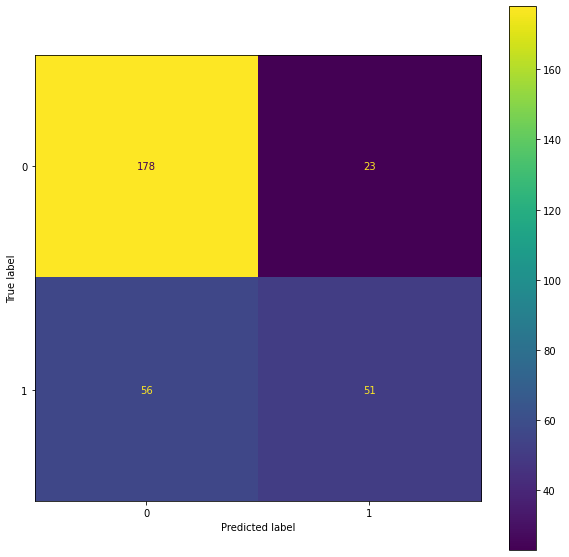

In [17]:
Confusion_Matrix(y_test  ,pred )

In [18]:
y_test2 = to_categorical(y_test)
y_test2.shape

(308, 2)

In [19]:
pred2 = to_categorical(pred)
pred2.shape

(308, 2)

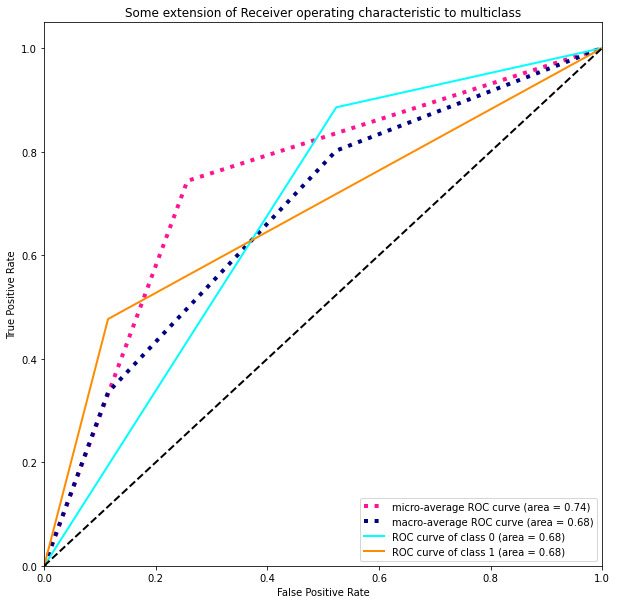

In [20]:
plot_roc_curve(y_test2 , pred2)